<a href="https://colab.research.google.com/github/BurovNV/MyRepo/blob/main/Clust_Silhuette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Показывает насколько среднее расстояние между точками одного кластера меньше среднего расстояния до точек другого кластера. 

Диапазон [-1, 1],

* -1 все плохо
* 0  как при рандомной кластеризации
* 1  все хорошо 

In [ ]:
# импорт библиотек
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# импорт доп библиотек
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.pyplot import cm

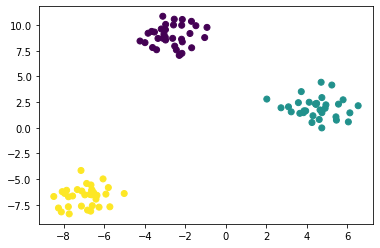

In [ ]:
# создание данных
x, y = datasets.make_blobs(random_state=42)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show();

In [ ]:
# функция для обучения модели
def km(n, x):
   km = KMeans(n_clusters=n, 
              init='k-means++', 
              n_init=10, 
              max_iter=300, 
              tol=1e-04, 
              random_state=42)
   km = km.fit_predict(x)
   return km

In [ ]:
# обучаем модели
# сперва 2 кластера
kmeans_2 = km(2, x)
# теперь 3
kmeans_3 = km(3, x)
# и четыре
kmeans_4 = km(4, x)

In [ ]:
# функция для отрисовки силуэтов
def print_silh(km, title):
  cluster_labels =  np.unique(km) 
  n_clusters = cluster_labels.shape[0] 
  silhouette_vals = silhouette_samples(x,
                                      km, 
                                      metric='euclidean')

  y_ax_lower, y_ax_upper = 0, 0
  yticks = [] 

  for i, с in enumerate(cluster_labels): 
    c_silhouette_vals = silhouette_vals [km == с] 
    c_silhouette_vals.sort() 
    y_ax_upper += len(c_silhouette_vals) 
    color =  cm.jet(float(i)/ n_clusters) 
    plt.barh(range(y_ax_lower,  y_ax_upper), 
                   c_silhouette_vals, 
                   height=1.0, 
                   edgecolor='none', 
                   color=color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2.) 
    y_ax_lower += len(c_silhouette_vals) 
  silhouette_avg = np.mean(silhouette_vals) 
  plt.axvline(silhouette_avg, 
              color="red", 
              linestyle="--") 
  plt.yticks(yticks,  cluster_labels  +  1) 
  plt.ylabel('Кластер') 
  plt.xlabel('Коэффициент силуэта')
  plt.tight_layout()
  plt.title(title + '\n')
  plt.show();

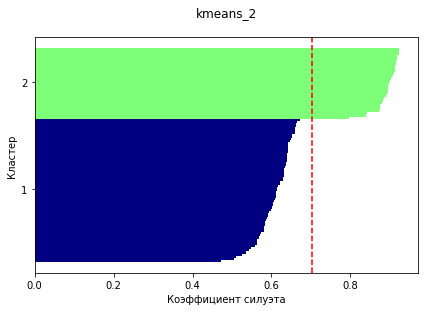

In [ ]:
# результаты для 2 кластеров
print_silh(kmeans_2, 'kmeans_2')

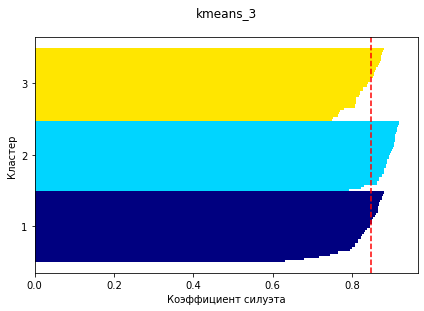

In [ ]:
# результаты для 3 кластеров - гораздо лучше
print_silh(kmeans_3, 'kmeans_3')

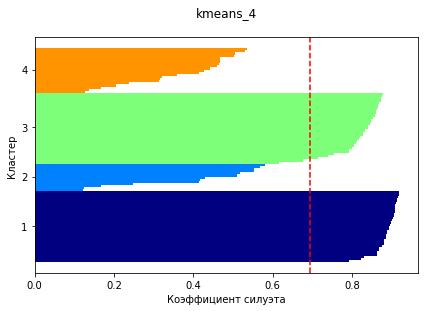

In [ ]:
# результаты для 4 кластеров - полная ерунда
print_silh(kmeans_4, 'kmeans_4')